<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_Prueba_03_An%C3%A1lisis_descriptivo_y_visual_de_salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre**: Rubén ¨Pizarro Gurrola, rpizarro@itdurango.edu.mx
Enero 31 2025



# Objetivo

Analiar descriptivamente el conjunto de datos salarios.

## Variables del conjunto de datos

* *work_year*. Año en que se levantó la encuesta a este profesional, o lo que ganaba en ese año.

* *experience_level*. Se relaciona con los años de experiencia en la profesión: SE (Senior, 5-10 años), MI (Mid-Level, 2-5 años.), EN (Entry-Level, 0-2 años) y EX (Expert 10+ años) .

* *employment_type*. Tiene que ver con el tiempo dedicado al trabajo.FT (Full-Time) - Tiempo Completo (40 hrs); PT (Part-Time) - Medio Tiempo (30 hrs); CT (Contractor) - Contratista Independiente es un profesional contratado por un período específico o para completar un proyecto determinado.; (Freelancer) - Autónomo o Independiente es un profesional independiente que trabaja en varios proyectos para diferentes clientes.

* *job_title*. Es la profesión o carrera profesional estudiada

* salary. El ingreso económico que percibe

* salary_currency. El tipo de moneda en que percibe el ingreso.

* *salary_in_usd*. El ingreso económico convertido a dólares americanos.

* *employee_residence*. El país en donde trabajan de acuerdo al momento en que se recabaron los datos.

* *remote_ratio*. En el contexto de la tecnología y el trabajo híbrido, el término *remote_ratio* hace referencia al porcentaje o nivel de trabajo remoto permitido o esperado dentro de un empleo

  * remote_ratio = 0 (Trabajo completamente presencial):
  * remote_ratio = 50 (Modelo híbrido o parcialmente remoto):
  * remote_ratio = 100 (Trabajo completamente remoto)

* *company_location*. El país en donde se localiza la empresa en donde labora el profesional.

* *company_size*. Tamaño de la empresa en donde laboral el profesional en término de número de empleados.

# Desarrollo

Se va a realizar lo siguiente:

* Cargar librerías
* Cargar funciones adecuadas
* Cargar datos
* Identificar variables de interés cuantitativas y cualitativas del conjunto de datos
* Explorar y analizar descriptivamente las variables numéricas o cuntitativas
* Visualizar histograma de las variables numéricas de interés
* Explorar y analizar descriptivamente las variables de tipo categórica o cualitativas
* Visualizar con diagrama de barra


## Cargar librerías



In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Tal vez se use
from scipy import stats # esatadísticos

import math


## Cargar funciones

Se cargan funciones personalizadas que se hacen anticipadamente para la ejecuión adecuada del caso


In [159]:

def f_cargar_datos(ruta_archivo, tipo='csv', hoja_excel=None, separador=','):
    """
    Carga datos desde un archivo especificado.

    Parámetros:
    - ruta_archivo (str): Ruta del archivo a cargar.
    - tipo (str): Tipo de archivo a cargar ('csv', 'excel', 'txt'). Por defecto es 'csv'.
    - hoja_excel (str): Nombre o índice de la hoja, en caso de ser un archivo Excel. Por defecto es None.
    - separador (str): Separador para archivos de texto o CSV. Por defecto es ','.

    Retorna:
    - DataFrame: Un DataFrame con los datos cargados.
    """
    try:
        if tipo == 'csv':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        elif tipo == 'excel':
            datos = pd.read_excel(ruta_archivo, sheet_name=hoja_excel)
        elif tipo == 'txt':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        else:
            raise ValueError("El tipo de archivo no es soportado. Use 'csv', 'excel' o 'txt'.")

        print("Datos cargados correctamente.")
        return datos

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al cargar los datos: {e}")


def f_eliminar_columnas(datos, columnas):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columnas (list): Lista de nombres de columnas a eliminar.

    Retorna:
    - DataFrame: El DataFrame sin las columnas especificadas.
    """
    try:
        # Verificar si todas las columnas existen
        columnas_existentes = [col for col in columnas if col in datos.columns]
        if not columnas_existentes:
            print("Ninguna de las columnas especificadas existe en el DataFrame.")
            return datos

        # Eliminar las columnas especificadas
        datos_actualizado = datos.drop(columns=columnas_existentes)
        print(f"Columnas eliminadas correctamente: {columnas_existentes}")
        return datos_actualizado

    except Exception as e:
        print(f"Error al eliminar las columnas: {e}")
        return datos


def f_tabla_frecuencia(datos, columna):
    """
    Genera una tabla de frecuencias para datos cualitativos.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columna (str): El nombre de la columna cualitativa a analizar.

    Retorna:
    - DataFrame: Tabla de frecuencias con columnas de frecuencia absoluta, relativa y acumulada.
    """
    try:
        # Contar frecuencias absolutas
        frecuencia = datos[columna].value_counts().reset_index()
        frecuencia.columns = [columna, 'Frecuencia_Absoluta']

        # Calcular frecuencia relativa y porcentual
        total = frecuencia['Frecuencia_Absoluta'].sum()
        frecuencia['Frecuencia_Relativa'] = frecuencia['Frecuencia_Absoluta'] / total
        frecuencia['Frecuencia_Porcentual'] = frecuencia['Frecuencia_Relativa'] * 100

        # Calcular frecuencias acumuladas
        frecuencia['Frecuencia_Acumulada'] = frecuencia['Frecuencia_Absoluta'].cumsum()
        frecuencia['Frecuencia_Porcentual_Acumulada'] = frecuencia['Frecuencia_Porcentual'].cumsum()

        return frecuencia

    except KeyError:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

def f_histograma(datos, variable, barras=10):
    # Convertir la variable a un array para cálculos estadísticos
    valores = np.array(datos[variable])

    # Calcular medidas estadísticas
    media = np.mean(valores)
    mediana = np.median(valores)
    # moda = stats.mode(valores)[0][0]

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=barras, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    # plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')

    # Etiquetas y título
    plt.title('Histograma con Media, Mediana y Moda')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

def f_barra(datos, variable, color='lightblue', mostrar='primeros'):
    # Contar la frecuencia de cada categoría
    frecuencias = datos[variable].value_counts()

    # Verificar cuántas categorías hay
    if len(frecuencias) > 10:
        if mostrar == 'primeros':
            frecuencias = frecuencias.head(10)  # Primeras 10 categorías
        elif mostrar == 'ultimos':
            frecuencias = frecuencias.tail(10)  # Últimas 10 categorías

    # Crear el diagrama de barras
    plt.figure(figsize=(8, 6))
    barras = plt.bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)

    # Agregar etiquetas y título
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.title(f'Diagrama de Barras de {variable} (Mostrando {mostrar} 10)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización si son largas

    # Mostrar valores encima de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=10)

    # Mostrar el gráfico
    plt.show()

def f_barra_multiple_matriz(datos, variables=None, color='lightblue', mostrar='primeros'):
    # Obtener columnas categóricas si no se especificaron
    if variables is None:
        variables = datos.select_dtypes(include=['object', 'category']).columns.tolist()

    # Determinar la disposición de la matriz según el número de columnas categóricas
    num_columnas = len(variables)
    if num_columnas <= 4:
        filas, columnas = 2, 2
    elif num_columnas <= 9:
        filas, columnas = 3, 3
    elif num_columnas <= 16:
        filas, columnas = 4, 4
    else:
        columnas = 4
        filas = math.ceil(num_columnas / columnas)

    # Crear la figura y subplots
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 5, filas * 4))
    axes = axes.flatten()  # Convertir los ejes en una lista para indexar fácilmente

    # Generar gráficos
    for i, variable in enumerate(variables):
        # Contar la frecuencia de cada categoría
        frecuencias = datos[variable].value_counts()

        # Mostrar solo las primeras o últimas 10 categorías si hay más de 10
        if len(frecuencias) > 10:
            if mostrar == 'primeros':
                frecuencias = frecuencias.head(10)
            elif mostrar == 'ultimos':
                frecuencias = frecuencias.tail(10)

        # Dibujar el diagrama de barras en el subplot correspondiente
        axes[i].bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{variable}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Mostrar valores sobre las barras
        for j, valor in enumerate(frecuencias.values):
            axes[i].text(j, valor, f'{valor}', ha='center', va='bottom', fontsize=8)

    # Ocultar subplots vacíos
    for ax in axes[num_columnas:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



## Cargar datos

Se hace uso de la función *f_cargar_datos()* previamente codificada y ejecutada para cargar los datos.



In [134]:
url = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/salaries%20-%20salaries.csv"
datos_cargados = f_cargar_datos(url)

Datos cargados correctamente.


## Visualizar los primeros 10 registros



In [135]:
datos_cargados.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Machine Learning Engineer,150000,USD,150000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,50000,USD,50000,US,100,US,M
2,2023,MI,FT,Data Engineer,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Engineer,45000,GBP,55368,GB,0,GB,M
4,2023,SE,FT,Data Science Engineer,220000,USD,220000,US,100,US,M
5,2023,SE,FT,Data Science Engineer,180000,USD,180000,US,100,US,M
6,2023,SE,FT,Machine Learning Engineer,331640,USD,331640,US,0,US,M
7,2023,SE,FT,Machine Learning Engineer,267720,USD,267720,US,0,US,M
8,2023,MI,FT,Data Engineer,190000,USD,190000,US,100,US,M
9,2023,MI,FT,Data Engineer,130000,USD,130000,US,100,US,M


## Visualizar los últimos 10 registros


In [136]:
datos_cargados.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7992,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
7993,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
7994,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
7995,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
7996,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
7997,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7998,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7999,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8000,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8001,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


## Preparar los datos

Del conjunto de datos original, solo seleccionar las variables de interés para análisis.

* work_year,
* experience_level,
* employment_type,
* salary_in_usd
* employee_residence,
* remote_ratio
* company_location,
* company_size

Excluir las variables 'salary', 'salary_currency'



In [137]:
columnas = ['salary', 'salary_currency']
datos = f_eliminar_columnas(datos_cargados, columnas)
datos.head()

Columnas eliminadas correctamente: ['salary', 'salary_currency']


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Machine Learning Engineer,150000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,50000,US,100,US,M
2,2023,MI,FT,Data Engineer,73824,GB,0,GB,M
3,2023,MI,FT,Data Engineer,55368,GB,0,GB,M
4,2023,SE,FT,Data Science Engineer,220000,US,100,US,M


## Ver estructura de datos

Los datos ya con las columnas adecuadas: los tipos de datos que se indica de tipo *int64* son numéricos o cuantitativos y los que aparecen como *object* se interpretan como categóricos o cualitativos.


In [138]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8002 non-null   int64 
 1   experience_level    8002 non-null   object
 2   employment_type     8002 non-null   object
 3   job_title           8002 non-null   object
 4   salary_in_usd       8002 non-null   int64 
 5   employee_residence  8002 non-null   object
 6   remote_ratio        8002 non-null   int64 
 7   company_location    8002 non-null   object
 8   company_size        8002 non-null   object
dtypes: int64(3), object(6)
memory usage: 562.8+ KB


## Determinar variables cualitativas



In [139]:
# Convertir la columna work_year remote_ratio a tipo string
datos['work_year'] = datos['work_year'].astype(str)
datos['remote_ratio'] = datos['remote_ratio'].astype(str)

## Explorar las variables cuantitativas

Con la función *describe()* se obtienen los estadísticos elementales de las variables cuantitativas de un conjunto de datos.


In [140]:
datos.describe()

,salary_in_usd
count,8002.000000
mean,149409.515121
std,64073.635884
min,15000.000000
25%,105000.000000
50%,142200.000000
75%,185975.000000
max,450000.000000


## Histograma de variables cuantitativas de interés

* salary_in_usd


**Cuestionamientos:** ¿Qué se observa con los datos cuantitativos?, ¿qué análisis se hace?

El valor de la media muestral es 149409 o lo que es lo mismo es el promedio de sueldos en dólares de los profesionales que trabajan en TI.

LA media muestral es de aproximadamente 142200 por debajo de la media muestral.

Se observa que la gran cantidad de los datos conforme y de acuerdo al salario la mayoría de ellos se econcentra entre 100000 y 200000 dolares.

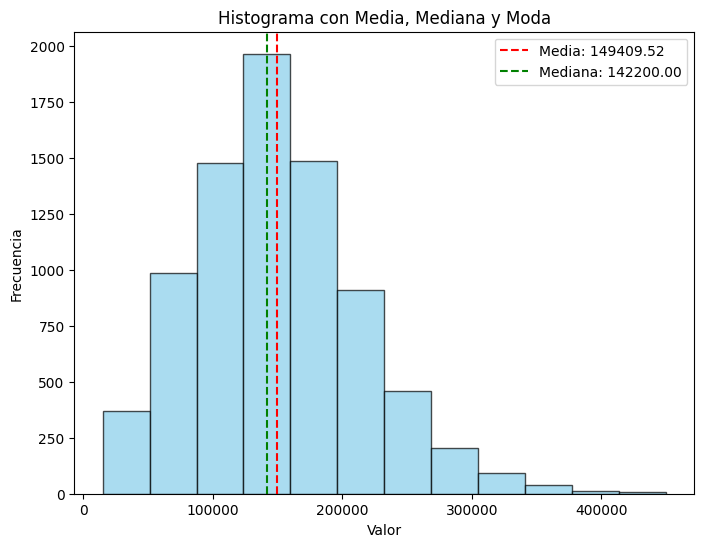

In [141]:
f_histograma(datos, 'salary_in_usd', 12)

## Explorar y analizar variables cualitativas

**Cuestionamientos:** ¿Qué se observa con los datos cualitativos?, ¿qué análisis se hace?

### work_year

In [142]:
tabla = f_tabla_frecuencia(datos, 'work_year')
tabla

,work_year,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,2023,6059,0.757186,75.718570,6059,75.718570
1,2022,1650,0.206198,20.619845,7709,96.338415
2,2021,218,0.027243,2.724319,7927,99.062734
3,2020,75,0.009373,0.937266,8002,100.000000


Aproximadamente el 75% de los datos recabados son profesionales que se encuestaron en el año 2023. y aproximadamente el 9% de los datos son del año 2020.


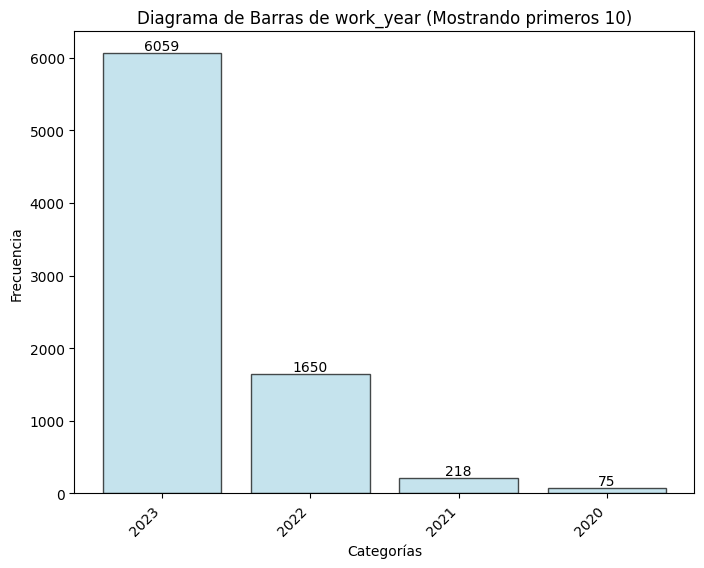

In [143]:
f_barra(datos, 'work_year')

### experience_level

In [144]:
tabla = f_tabla_frecuencia(datos, 'experience_level')
tabla

,experience_level,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,SE,5772,0.721320,72.131967,5772,72.131967
1,MI,1556,0.194451,19.445139,7328,91.577106
2,EN,429,0.053612,5.361160,7757,96.938265
3,EX,245,0.030617,3.061735,8002,100.000000


Aproximadamente el 72% de los datos recabados son profesionales con nivel de experiencia SE "*SENIOR*" el 19% nivel MI ()

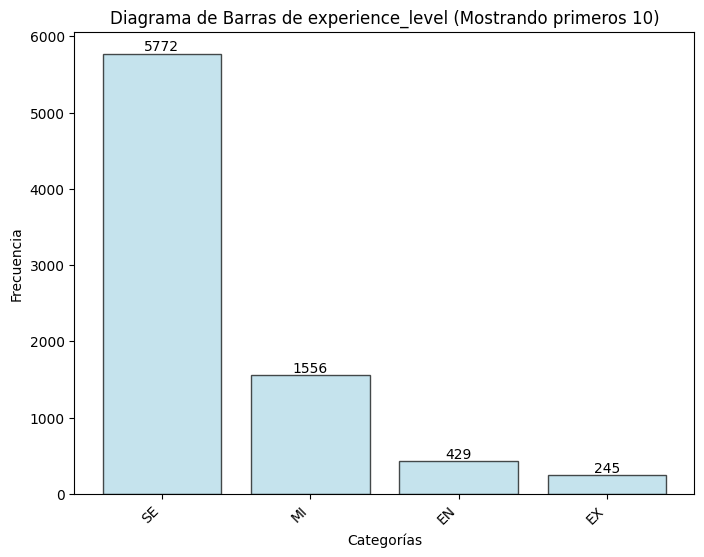

In [145]:
f_barra(datos, 'experience_level')

### employment_type


In [146]:
tabla = f_tabla_frecuencia(datos, 'employment_type')
tabla

,employment_type,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,FT,7960,0.994751,99.475131,7960,99.475131
1,CT,18,0.002249,0.224944,7978,99.700075
2,PT,13,0.001625,0.162459,7991,99.862534
3,FL,11,0.001375,0.137466,8002,100.000000


Del total de los datos de la muestra, aproximadamente el 99% de los profesionales es de tiempo completo.

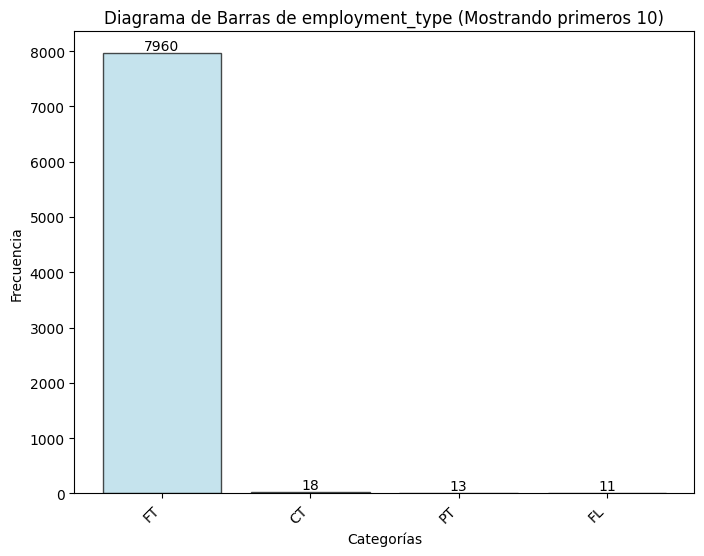

In [147]:
f_barra(datos, 'employment_type')

### job_title



In [148]:
tabla = f_tabla_frecuencia(datos, 'job_title')
tabla

,job_title,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Data Engineer,1900,0.237441,23.744064,1900,23.744064
1,Data Scientist,1688,0.210947,21.094726,3588,44.838790
2,Data Analyst,1192,0.148963,14.896276,4780,59.735066
3,Machine Learning Engineer,820,0.102474,10.247438,5600,69.982504
4,Applied Scientist,226,0.028243,2.824294,5826,72.806798
...,...,...,...,...,...,...
113,Sales Data Analyst,1,0.000125,0.012497,7998,99.950012
114,Data Quality Engineer,1,0.000125,0.012497,7999,99.962509
115,Deep Learning Researcher,1,0.000125,0.012497,8000,99.975006
116,Data DevOps Engineer,1,0.000125,0.012497,8001,99.987503


Existe una porcentaje de aproximadamente el 23% de profesionales que son *Data Engineer*, un 21% de profesionales *Data Scientist*, un 14% de *Data Analyst* y un 2% de profesionales que son *Applied Scientist* lo que concentra aproximadamente el 60% de los profesionales de la muestra extraída.

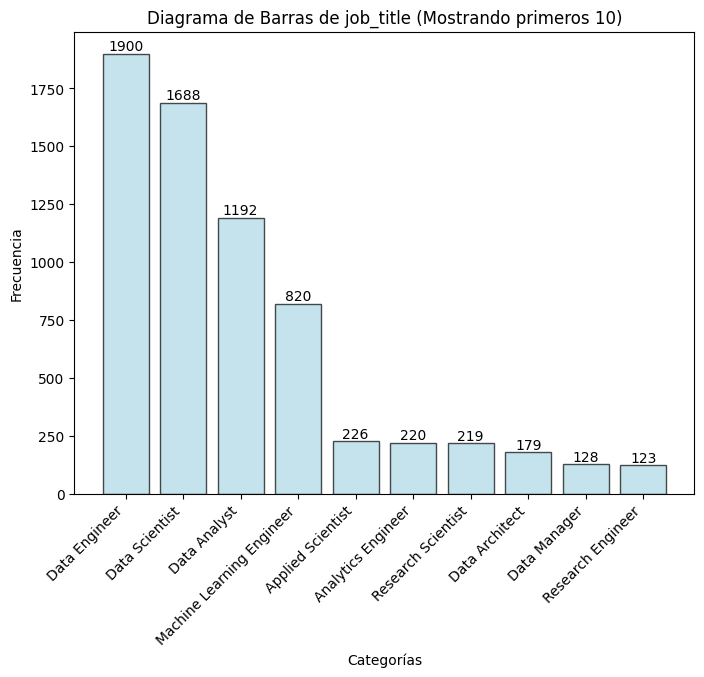

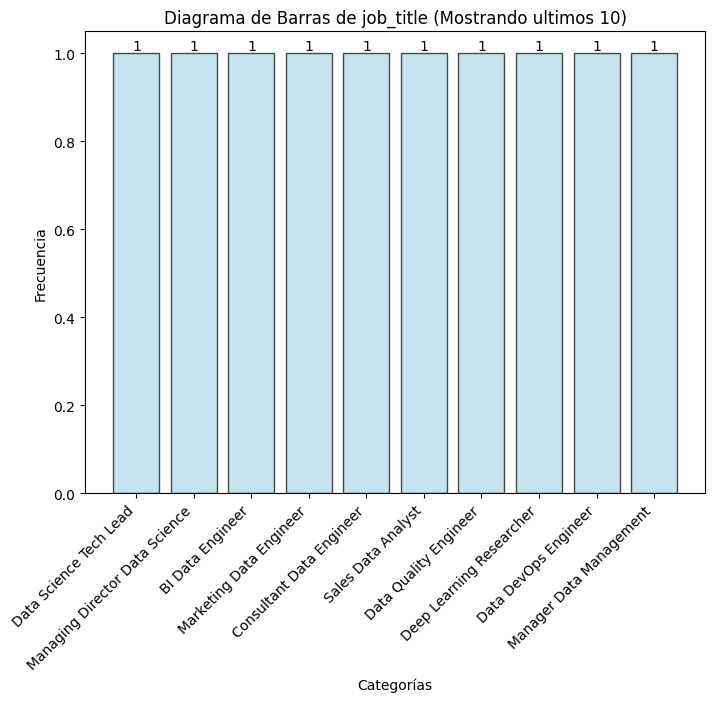

In [149]:
f_barra(datos, 'job_title', mostrar='primeros')
f_barra(datos, 'job_title', mostrar='ultimos')

### employee_residence


In [150]:
tabla = f_tabla_frecuencia(datos, 'employee_residence')
tabla

,employee_residence,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,US,6796,0.849288,84.928768,6796,84.928768
1,GB,392,0.048988,4.898775,7188,89.827543
2,CA,180,0.022494,2.249438,7368,92.076981
3,ES,109,0.013622,1.362159,7477,93.439140
4,DE,65,0.008123,0.812297,7542,94.251437
...,...,...,...,...,...,...
80,PE,1,0.000125,0.012497,7998,99.950012
81,IL,1,0.000125,0.012497,7999,99.962509
82,ZA,1,0.000125,0.012497,8000,99.975006
83,GE,1,0.000125,0.012497,8001,99.987503


Aproximadamente el 84% de los datos de la muestra son profesionales que laboran en Estados Unidos (*US*).



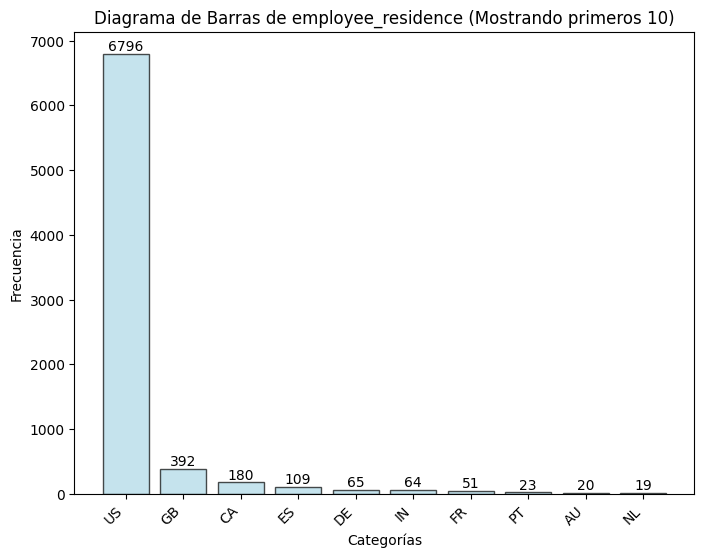

In [151]:
f_barra(datos, 'employee_residence', mostrar='primeros')

### remote_ratio

In [152]:
tabla = f_tabla_frecuencia(datos, 'remote_ratio')
tabla

,remote_ratio,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,0,4695,0.586728,58.672832,4695,58.672832
1,100,3091,0.386278,38.627843,7786,97.300675
2,50,216,0.026993,2.699325,8002,100.000000


El 58% de los profesionales consultados en la muestra trabajan en modalidad presencial, el 38% em modalidad híbrida y el 2% en modalidad virtual.

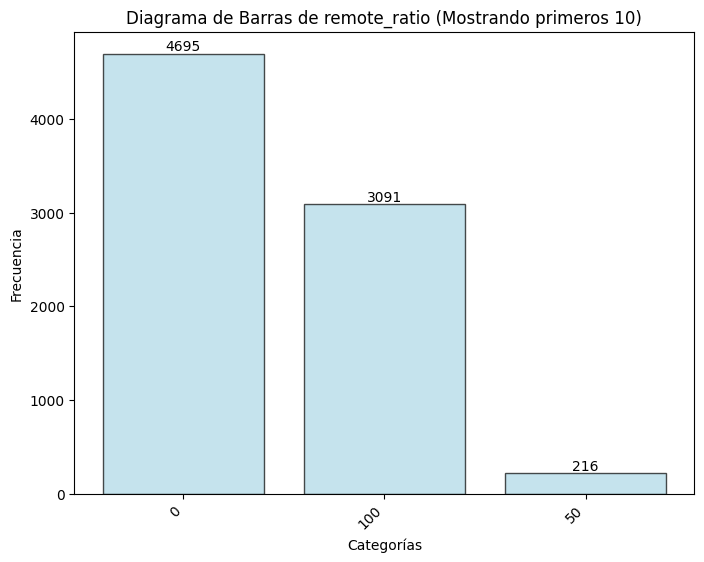

In [153]:
f_barra(datos, 'remote_ratio')

### company_location

In [154]:
tabla = f_tabla_frecuencia(datos, 'company_location')
tabla

,company_location,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,US,6843,0.855161,85.516121,6843,85.516121
1,GB,399,0.049863,4.986253,7242,90.502374
2,CA,181,0.022619,2.261935,7423,92.764309
3,ES,106,0.013247,1.324669,7529,94.088978
4,DE,72,0.008998,0.899775,7601,94.988753
...,...,...,...,...,...,...
68,BS,1,0.000125,0.012497,7998,99.950012
69,IR,1,0.000125,0.012497,7999,99.962509
70,ZA,1,0.000125,0.012497,8000,99.975006
71,HK,1,0.000125,0.012497,8001,99.987503


El 85% de las empresas en donde laboran los profesionales de TI de la muestra,son organizaciones que se encuentran localizadas en Estados Unidos.

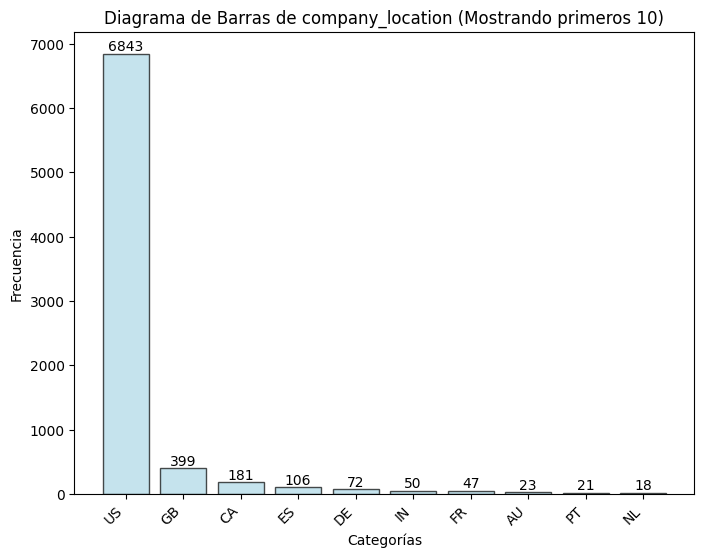

In [155]:
f_barra(datos, 'company_location', mostrar='primeros')

### company_size

In [156]:
tabla = f_tabla_frecuencia(datos, 'company_size')
tabla

,company_size,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,M,7134,0.891527,89.152712,7134,89.152712
1,L,702,0.087728,8.772807,7836,97.925519
2,S,166,0.020745,2.074481,8002,100.000000


Los profesionales de TI de esta muestra trabajan aproximadamente en un 89% en empresas medianas, un 8% en empresas grandes y un 2% en empresas pequeñas.

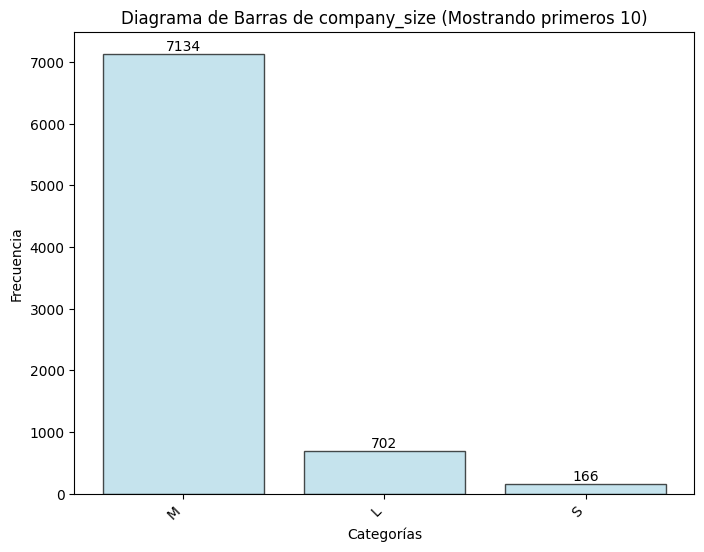

In [157]:
f_barra(datos, 'company_size')

## Análisis descriptivio visual de todas las variables cualitativas

Con la funci´pon *select_dtypes()* se selecciona solo las variables categóricas *object*.


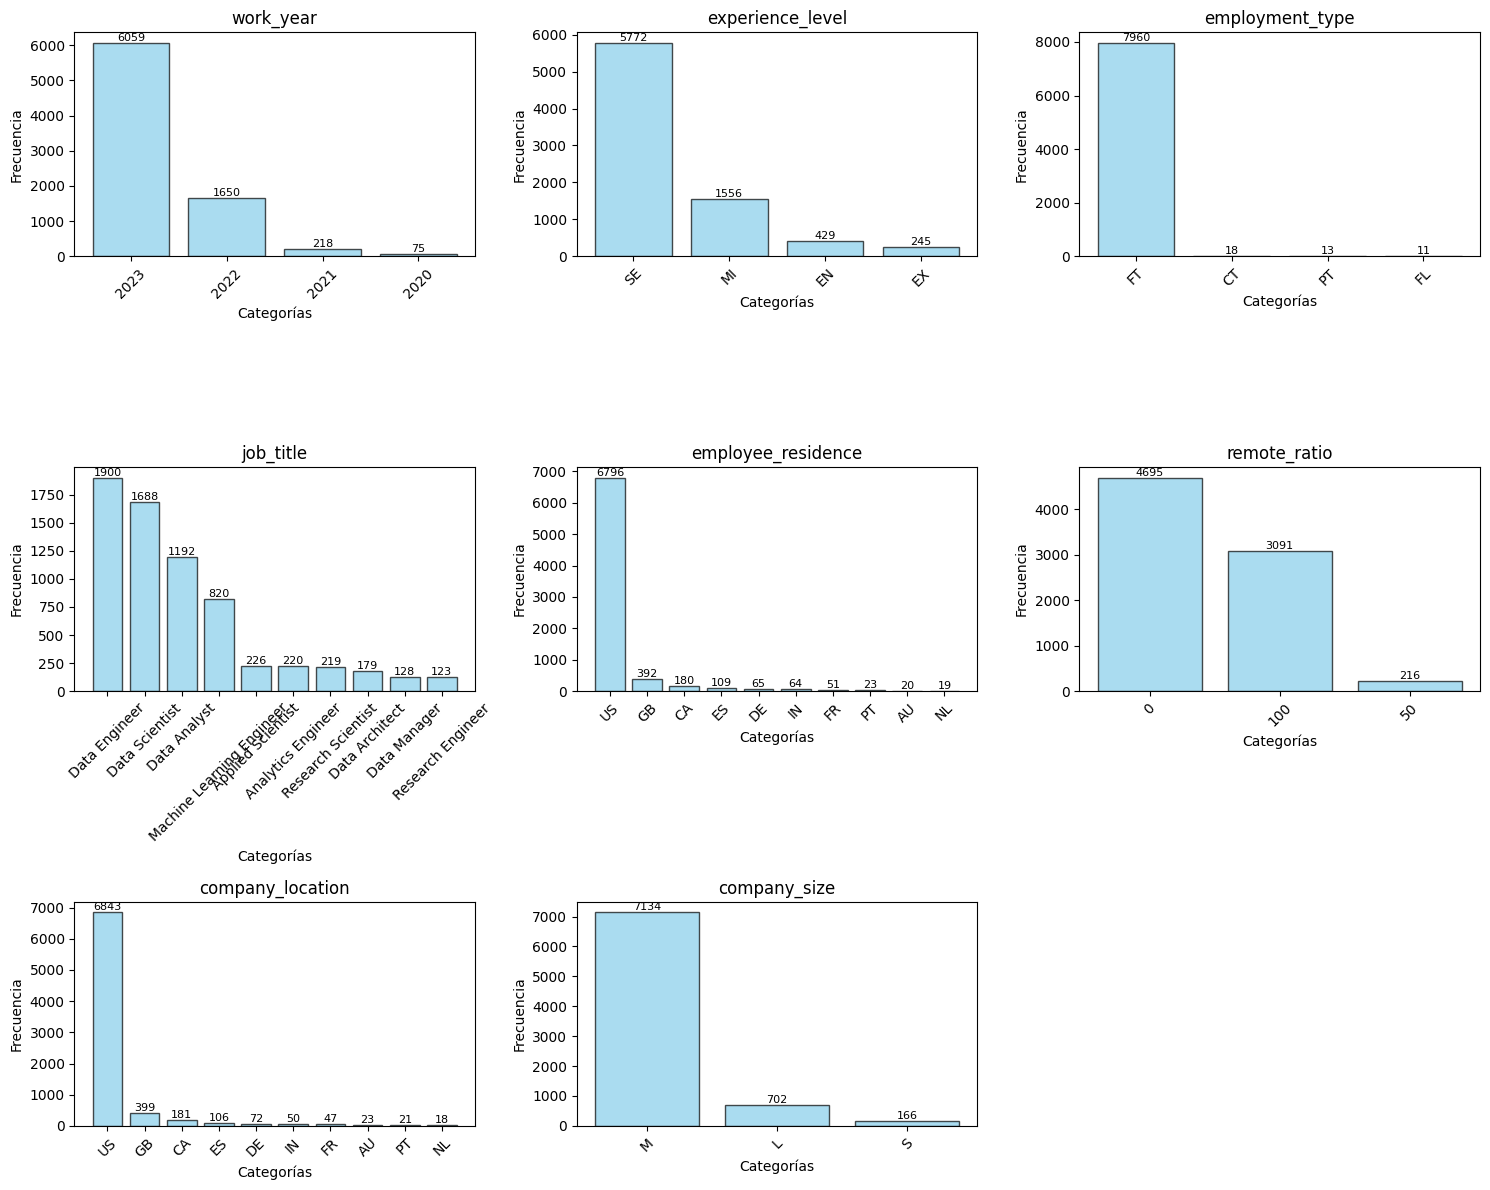

In [160]:
columnas_categoricas = datos.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_categoricas
f_barra_multiple_matriz (datos, variables=columnas_categoricas, color='skyblue', mostrar='primeros')

# Interpretación

Pendiente